In [1]:
#Import Libraries
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data
spotify_song_data= pd.read_csv("data/song_data.csv")
spotify_song_info= pd.read_csv("data/song_info.csv") 

In [3]:
song_data = spotify_song_data.copy()
song_info = spotify_song_info.copy()

In [4]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
song_data.shape

(18835, 15)

In [6]:
# ceaning data
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
# making all float
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [9]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [10]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [11]:
song_data['popularity']

0        1
1        0
2        1
3        1
4        0
        ..
18830    0
18831    0
18832    0
18833    0
18834    0
Name: popularity, Length: 18835, dtype: int64

In [12]:
#popular songs' data
popular_songs=song_data[song_data["popularity"]==1]


In [13]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


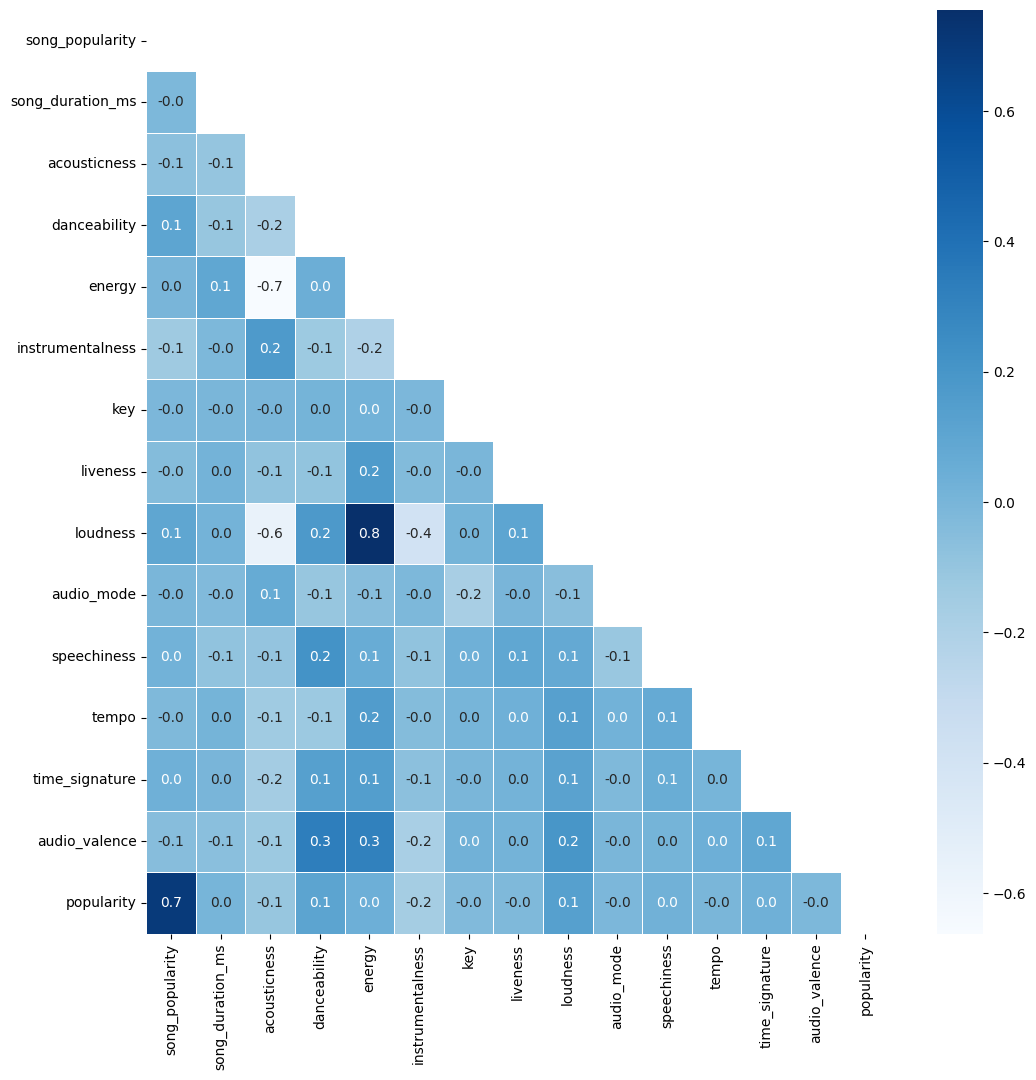

In [14]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

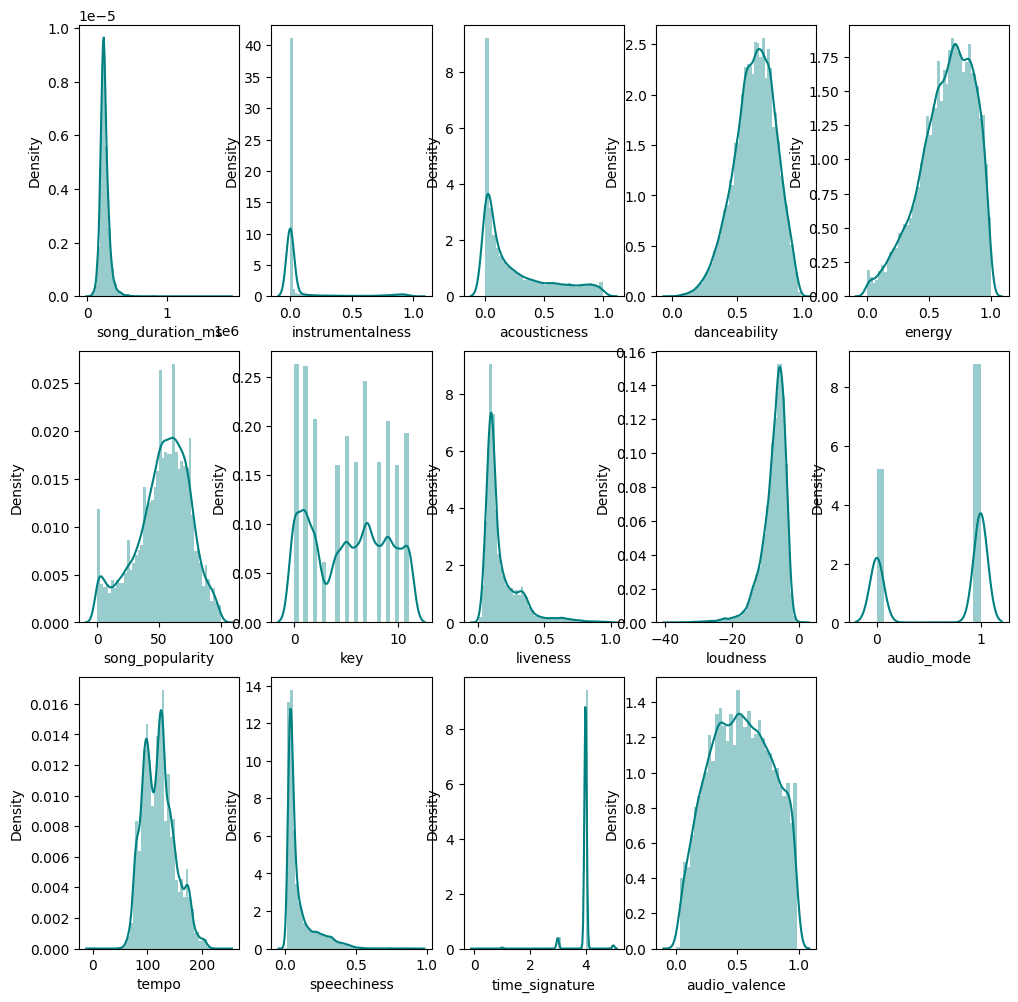

In [15]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

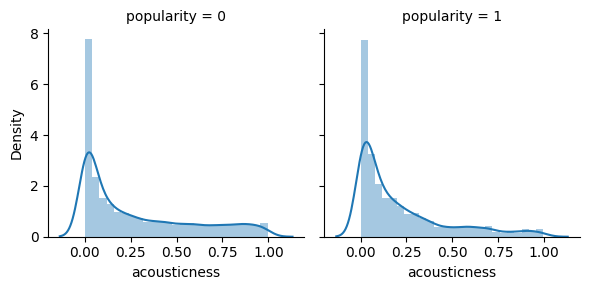

In [16]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

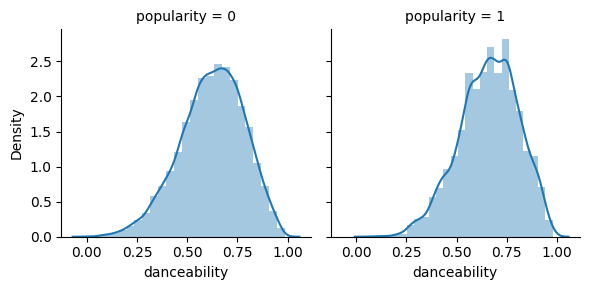

In [17]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

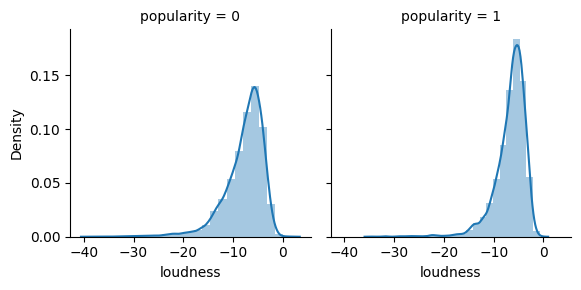

In [18]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

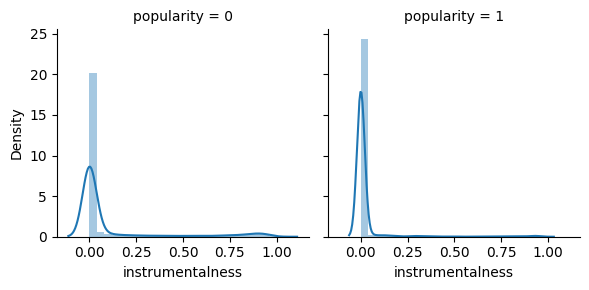

In [19]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

In [20]:
# models 
y = song_data['popularity'].values.reshape(-1,1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]])

In [27]:
X = song_data.drop(['popularity','song_name'], axis =1 )
X

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474
1,66,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370
2,76,231733.0,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324
3,74,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198
4,56,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645.0,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1.0,0.0348,113.969,4.0,0.300
18831,60,205666.0,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0.0,0.0301,94.286,4.0,0.265
18832,23,182211.0,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1.0,0.0355,130.534,4.0,0.286
18833,55,352280.0,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1.0,0.0328,106.063,4.0,0.323


In [39]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=78)                                                                                                                                                     

In [40]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [41]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [42]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [44]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [45]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["not_popular", "popular"], columns=["not_popular", "popular"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [47]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,not_popular,popular
not_popular,3354,0
popular,0,1355


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3354
           1       1.00      1.00      1.00      1355

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[3354    0]
 [   0 1355]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3354
           1       1.00      1.00      1.00      1355

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



In [68]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
DecisionTree_score=dt.score(X_test,y_test)
print("Train ccuracy of decision tree:",dt.score(X_train,y_train))
print("Test accuracy of decision tree:",dt.score(X_test,y_test))

Train ccuracy of decision tree: 1.0
Test accuracy of decision tree: 1.0


In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [49]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [50]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8550191136910661
Testing Data Score: 0.8517732002548312


In [64]:
predictions = classifier.predict(X_test)

In [65]:
#Calculate the Accuracy Score
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
score = accuracy_score(y_test, predictions)
print(f'accurancy_score is {score}')

accurancy_score is 0.8517732002548312


In [67]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(X_train,y_train)
print("Train accuracy of svm algo:",svm.score(X_train,y_train))
print("Test accuracy of svm algo:",svm.score(X_test,y_test))

Train accuracy of svm algo: 0.7101798102789183
Test accuracy of svm algo: 0.7122531322998513
